In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sns

In [5]:
import os
print("Current Working Directory:", os.getcwd())
current_directory = os.getcwd()
train_path = os.path.join(current_directory, "dataset","Train")
valid_path = os.path.join(current_directory, "dataset","Valid")
test_path = os.path.join(current_directory, "dataset","Test")

Current Working Directory: c:\Users\Dell\Desktop\Potato-disease-Prediction\dataset


In [ ]:
import tensorflow as tf  

training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)


In [9]:
import os
print("Path exists:", os.path.exists(train_path))


Path exists: False


In [10]:
train_path = r"c:\Users\Dell\Desktop\Potato-disease-Prediction\dataset\Train"


In [11]:
train_path = r"c:\Users\Dell\Desktop\Potato-disease-Prediction\dataset\Train"


In [12]:
import os
print("Path exists:", os.path.exists(train_path))


Path exists: True


In [13]:
import tensorflow as tf  

training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)


Found 900 files belonging to 3 classes.


In [14]:
# Get the class labels
labels = training_set.class_names
print(labels)


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

In [16]:
valid_path = r"c:\Users\Dell\Desktop\Potato-disease-Prediction\dataset\Valid"


In [17]:
import os
print("Path exists:", os.path.exists(valid_path))


Path exists: True


In [18]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 300 files belonging to 3 classes.


In [19]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 671ms/step - accuracy: 0.3206 - loss: 1.3355 - val_accuracy: 0.5933 - val_loss: 1.0609
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 660ms/step - accuracy: 0.4807 - loss: 1.0332 - val_accuracy: 0.6133 - val_loss: 0.8483
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 719ms/step - accuracy: 0.6865 - loss: 0.7348 - val_accuracy: 0.6833 - val_loss: 0.6679
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 715ms/step - accuracy: 0.7864 - loss: 0.4638 - val_accuracy: 0.8033 - val_loss: 0.4573
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 710ms/step - accuracy: 0.7714 - loss: 0.5048 - val_accuracy: 0.8667 - val_loss: 0.3449
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 713ms/step - accuracy: 0.8388 - loss: 0.3625 - val_accuracy: 0.9233 - val_loss: 0.2008
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 712ms/step - accuracy: 0.9138 - loss: 0.2015 - val_accuracy: 0.9067 - val_loss: 0.1999
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 704ms/step - accuracy: 0.9316 - loss: 0.1534 - val_accu

In [23]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - accuracy: 0.9760 - loss: 0.0794
Training accuracy: 0.9744444489479065


In [24]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - accuracy: 0.9465 - loss: 0.1473
Validation accuracy: 0.9366666674613953


In [25]:
cnn.save('trained_plant_disease_model.keras')

In [26]:
training_history.history


{'accuracy': [0.3544444441795349,
  0.49888888001441956,
  0.7122222185134888,
  0.8166666626930237,
  0.8022222518920898,
  0.8777777552604675,
  0.9277777671813965,
  0.9433333277702332,
  0.9433333277702332,
  0.9466666579246521],
 'loss': [1.1953768730163574,
  1.0028669834136963,
  0.6352146863937378,
  0.421088844537735,
  0.4412993788719177,
  0.2968417704105377,
  0.184944286942482,
  0.13849689066410065,
  0.1614445000886917,
  0.15115714073181152],
 'val_accuracy': [0.5933333039283752,
  0.6133333444595337,
  0.6833333373069763,
  0.8033333420753479,
  0.8666666746139526,
  0.9233333468437195,
  0.9066666960716248,
  0.9333333373069763,
  0.9666666388511658,
  0.9366666674613953],
 'val_loss': [1.06088125705719,
  0.8482909798622131,
  0.6678699851036072,
  0.45731937885284424,
  0.34492743015289307,
  0.20082531869411469,
  0.19994264841079712,
  0.15099845826625824,
  0.11351842433214188,
  0.1562308818101883]}

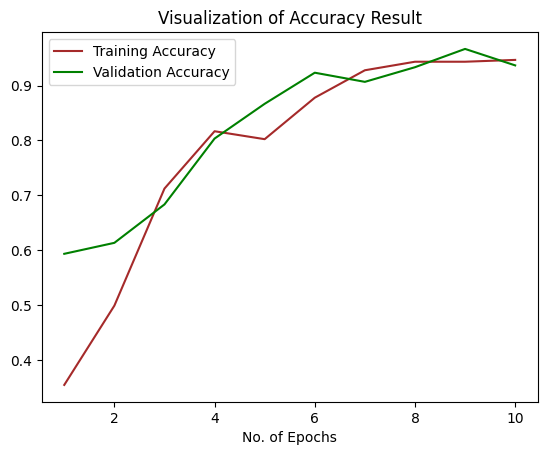

In [27]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [34]:
model = tf.keras.models.load_model("old_model.h5")  # Load old model
model.save("trained_plant_disease_model.keras")  # Save in .keras format


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'old_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [35]:
import os

file_path = "old_model.h5"  # Update with the correct path if needed
print("File exists:", os.path.exists(file_path))


File exists: False


In [38]:
import os

models_dir = r"C:\Users\Dell\Desktop\Potato-disease-Prediction\models"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)  # Create the directory

# Now save the model
model.save(os.path.join(models_dir, "trained_plant_disease_model.keras"))
print("Model saved successfully!")


Model saved successfully!


In [39]:
import os

# Define the model path
model_path = r"C:\Users\Dell\Desktop\Potato-disease-Prediction\models\trained_plant_disease_model.keras"

# Save the model
model.save(model_path)
print("Model saved successfully!")


Model saved successfully!


In [40]:
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model(r"C:\Users\Dell\Desktop\Potato-disease-Prediction\models\trained_plant_disease_model.keras")

print("Model loaded successfully!")


Model loaded successfully!


c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [41]:
import os

models_dir = r"C:\Users\Dell\Desktop\Potato-disease-Prediction\models"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)  # Create the directory

# Now save the model
model.save(os.path.join(models_dir, "trained_plant_disease_models.keras"))
print("Model saved successfully!")


Model saved successfully!


In [42]:
model = tf.keras.models.load_model(r"C:\Users\Dell\Desktop\Potato-disease-Prediction\models\trained_plant_disease_model.keras")


In [43]:
import tensorflow as tf

# Define the model save path
model_path = r"C:\Users\Dell\Desktop\Potato-disease-Prediction\models\trained_plant_disease_model.keras"

# Save model in .keras format
model.save(model_path, save_format="keras")
print("Model saved in .keras format successfully!")


Model saved in .keras format successfully!


In [44]:
model = tf.keras.models.load_model(r"C:\Users\Dell\Desktop\Potato-disease-Prediction\models\trained_plant_disease_model.keras")


In [45]:
model.save(r"C:\Users\Dell\Desktop\Potato-disease-Prediction\models\trained_plant_disease_model.keras")
